In [89]:
import json
import pandas as pd

# Assuming you have a file named 'example.json' in the same directory as your script
file_path = 'instance_depart/huge.json'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Load the JSON data from the file
    data = json.load(file)


In [74]:
data['land_substation_cable_types']

[{'rating': 200,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 4.7250000000000005,
  'id': 1,
  'fixed_cost': 90.0},
 {'rating': 300,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 7.6499999999999995,
  'id': 2,
  'fixed_cost': 90.0},
 {'rating': 500,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 11.475,
  'id': 3,
  'fixed_cost': 112.5},
 {'rating': 900,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 22.275000000000002,
  'id': 4,
  'fixed_cost': 112.5},
 {'rating': 1450,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 31.949999999999996,
  'id': 5,
  'fixed_cost': 135.0},
 {'rating': 2400,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 54.22500000000001,
  'id': 6,
  'fixed_cost': 135.0},
 {'rating': 200,
  'probability_of_failure': 0.000273972602739726,
  'variable_cost': 3.1500000000000004,
  'id': 7,
  'fixed_cost': 60.0},
 {'rating': 300,
  'p

In [106]:
def get_substation_type(data):
    min_rating = 1e6
    min_cost = 1e6
    eligible_types = []
    selected_type = None
    for substation_type in data['substation_types']:
        if min_rating > substation_type['rating']:
            min_rating = substation_type['rating']
            eligible_types = [substation_type]
        elif min_rating == substation_type['rating']:
            eligible_types.append(substation_type)

    for e in eligible_types:
        if min_cost > e['cost']:
            min_cost = e['cost']
            selected_type = e
    
    return selected_type

sub_type = get_substation_type(data)
sub_type

eligible_land_cables = []
for cable_type in data['land_substation_cable_types']:
    if cable_type['rating'] >= sub_type['rating']:
        eligible_land_cables.append(cable_type)

min_cost = 1e6
p = []
for c in eligible_land_cables:
    if min_cost >= 25*c['variable_cost'] + c['fixed_cost']:
        p = [c]
    elif min_cost == 25*c['variable_cost'] + c['fixed_cost']:
        p.append(c)

minval = min(p, key=lambda x: x['probability_of_failure'])
p = [d for d in p if d['probability_of_failure'] == minval['probability_of_failure']]
selected_type = max(p, key=lambda x: x['rating'])
selected_type

{'rating': 2400,
 'probability_of_failure': 0.00410958904109589,
 'variable_cost': 14.875,
 'id': 28,
 'fixed_cost': 85.0}

In [107]:
14.875*25+85

456.875

In [84]:
def distance(substation1, substation2):
    #distance squared
    return (substation2['x'] - substation1['x'])**2 + (substation2['y'] - substation1['y'])**2

In [90]:
import numpy as np
np.sqrt(distance(data['substation_locations'][0],data['wind_turbines'][-1]))

60.24815349867579

In [81]:
eligible_land_cables

[{'rating': 200,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 4.7250000000000005,
  'id': 1,
  'fixed_cost': 90.0},
 {'rating': 300,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 7.6499999999999995,
  'id': 2,
  'fixed_cost': 90.0},
 {'rating': 500,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 11.475,
  'id': 3,
  'fixed_cost': 112.5},
 {'rating': 900,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 22.275000000000002,
  'id': 4,
  'fixed_cost': 112.5},
 {'rating': 1450,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 31.949999999999996,
  'id': 5,
  'fixed_cost': 135.0},
 {'rating': 2400,
  'probability_of_failure': 5.479452054794521e-05,
  'variable_cost': 54.22500000000001,
  'id': 6,
  'fixed_cost': 135.0},
 {'rating': 200,
  'probability_of_failure': 0.000273972602739726,
  'variable_cost': 3.1500000000000004,
  'id': 7,
  'fixed_cost': 60.0},
 {'rating': 300,
  'p

In [71]:
eligible_types

[{'cost': 300.0,
  'rating': 200,
  'probability_of_failure': 1.3698630136986302e-05,
  'id': 1},
 {'cost': 200.0,
  'rating': 200,
  'probability_of_failure': 6.84931506849315e-05,
  'id': 7},
 {'cost': 160.0,
  'rating': 200,
  'probability_of_failure': 0.000273972602739726,
  'id': 13},
 {'cost': 140.0,
  'rating': 200,
  'probability_of_failure': 0.0008219178082191781,
  'id': 19}]

In [150]:
from sklearn.cluster import KMeans
import numpy as np

def turbines_cluster(data, n_clusters):
    idxy = pd.DataFrame().from_dict(data['wind_turbines'])
    id = idxy['id'].to_numpy()
    x = idxy[['x']].to_numpy()
    y = idxy[['y']].to_numpy()

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(y)

    cluster_centers = np.concatenate((np.mean(x) * np.ones_like(kmeans.cluster_centers_), kmeans.cluster_centers_), axis=1)
    labels = kmeans.labels_
    

    plt.scatter(x[:,0], y[:,0], c=labels, cmap='viridis', alpha=0.7, edgecolors='k', linewidths=1.0)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('KMeans Clustering')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
    return (cluster_centers, (id,labels))

/Users/adriensade/.julia/conda/3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


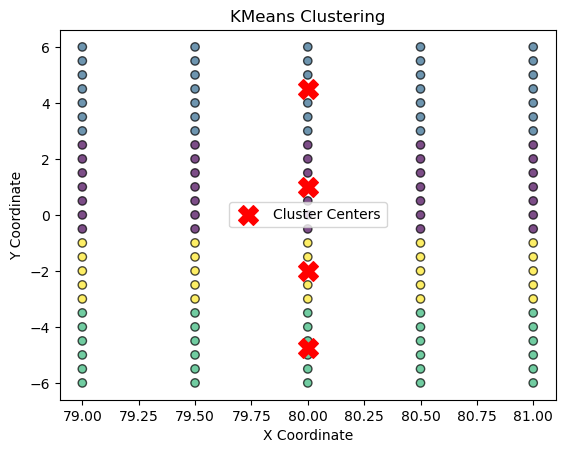

In [151]:
_, turbine_cluster = turbines_cluster(data, 4)

In [152]:
def turbines_sol(data, substation_list, turbine_cluster):
    turbine_id, turbine_cluster =  turbine_cluster
    turbines_sol = []
    for t in range(len(data['wind_turbines'])):
        turbines_sol.append(
                            turbine(id=turbine_id[t],
                                    substation_id=substation_list[turbine_cluster[t]]
                                    ).to_dict()

                                )   
    return turbines_sol


In [153]:
substation_list = [substation(i, i, i) for i in range(4)]

In [154]:
turbine_cluster

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [155]:
turbines_sol(data, substation_list, turbine_cluster)

[{'id': 1,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 2,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 3,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 4,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 5,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 6,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 7,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 8,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 9,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 10,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 11,
  'substation_id': self.id=2, self.land_cable_type=2, self.substation_type=2},
 {'id': 

In [15]:
class substation():
    def __init__(self, id, land_cable_type, substation_type):
        self.id = id
        self.land_cable_type = land_cable_type
        self.substation_type = substation_type
    
    def __str__(self):
        return f"{self.id=}, {self.land_cable_type=}, {self.substation_type=}"

    def __repr__(self):
        return self.__str__()

class substation_substation_cable():
    def __init__(self, substation_id, other_substation_id, cable_type):
        self.substation_id = substation_id
        self.other_substation_id = other_substation_id
        self.cable_type = cable_type

    def __str__(self):
        return f"{self.substation_id=}, {self.other_substation_id=}, {self.cable_type=}"

    def __repr__(self):
        return self.__str__()

class turbine():
    def __init__(self, id, substation_id):
        self.id = id
        self.substation_id = substation_id
    
    def __str__(self):
        return f"{self.id=}, {self.substation_id=}"

    def __repr__(self):
        return self.__str__()
    
    def to_dict(self):
        return {'id': self.id, 'substation_id': self.substation_id}

class parser_out():
    def __init__(self, instance_name, substations, substation_substation_cables, turbines):
        self.instance_name = instance_name
        self.folder_out = "instance_arrive/"
        self.substations = substations
        self.substation_substation_cables = substation_substation_cables
        self.turbines = turbines
    
    def create_json(self):
        dict_out = {
            "substation": self.substations,
            "substation_substation_cables": self.substation_substation_cables,
            "turbines": self.turbines
            }

        with open(f"{self.folder_out}/{self.instance_name}_out.json", "w+") as f:
            json.dump(dict_out, f)


def distance(substation1, substation2):
    #distance squared
    return (substation2['x'] - substation1['x'])**2 + (substation2['y'] - substation1['y'])**2

def get_substation(id, substation_list):
    for substation in substation_list:
        if substation['id'] == id:
            return substation
    raise ValueError(f"substation {id} not found")

